#       CEFET-RJ - UNED Nova Iguaçu
##   Dep. Engenharia de Controle e Automação 
## Disciplina: Processamento Digital de Imagens
Professor: Gabriel Matos Araujo<br>

# HDR
Aluno: Eros Gabriel de Abreu Caiafa

Primeiro foram importadas as bibliotecas necessárias:

- **cv2:** Para o processamento de imagens
- **glob:** Para fazer a varredura de diretório
- **matplotlib:** Para a exibição das imagens e passos intermediários

In [9]:
import cv2
from glob import iglob
import matplotlib.pyplot as plt
%matplotlib inline

São lidas todas as imagens do diretório

In [3]:
images = [cv2.imread(x) for x in iglob('stlouis_high/*.jpg')]
len(images)

4

Então são exibidas as imagens em 2 linhas e colunas

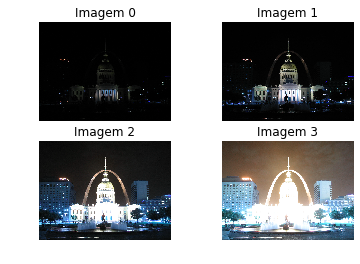

In [7]:
LINES = 2
COLS = 2
fig, axs_arr = plt.subplots(LINES, COLS)
for i, axs in enumerate(axs_arr):
    for j, ax in enumerate(axs):
        ax.axis("off")
        image_n = i * LINES + j
        ax.set_title(f'Imagem {image_n}')
        ax.imshow(images[image_n])

E então é feita a fusão das imagens, os valores veem em escala de 0 até 1, mas em alguns momentos deveriam saturar, então se faz necessário saturar esses valores que ultrapassam a escala

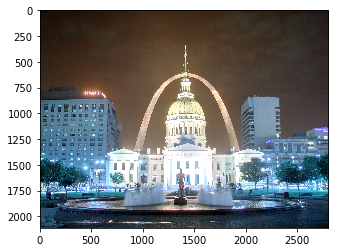

In [16]:
mergeMertens = cv2.createMergeMertens()
exposureFusion = mergeMertens.process(images)
exposureFusion[exposureFusion > 1] = 1
exposureFusion[exposureFusion < 0] = 0
plt.imshow(exposureFusion)

Armazenando o resultado final do nosso projeto

In [18]:
cv2.imwrite('HDR_combined.png', exposureFusion * 255)

True